In [1]:
# import graphix 
import numpy as np

import networkx as nx
# import matplotlib.pyplot as plt
from gflow import flow 
from graphix.transpiler import Circuit 
from graphix.pattern import *
from graphix.pretty_plot_funtions import *
from qiskit.circuit import Parameter, ParameterExpression, ParameterVector

ModuleNotFoundError: No module named 'gflow'

#### Variational Ansatz

In [9]:
from typing import Union
def build_basic_ansatz(n: int, layers: int, params: Union[None, list, str] = None ):

    if isinstance(params, list ):  assert len(params) == n * layers ## checks

    c = Circuit(n)
    for l in range(layers):
        
        for i in range(n): ## circular entangelemnt 
            c.cnot(i %n,(i+1)%n)

        if not isinstance(params, list):
            for i in range(n): ## paramterised rx rotations 
                c.rx(i, np.random.random()) 
        elif isinstance(params, str) and params == 'th' :
            for i in range(n):
                c.rx(i, Parameter('th')) 
        else :
            for i in range(n):
                c.rx(i, params[ n*l + i]) 

    return c

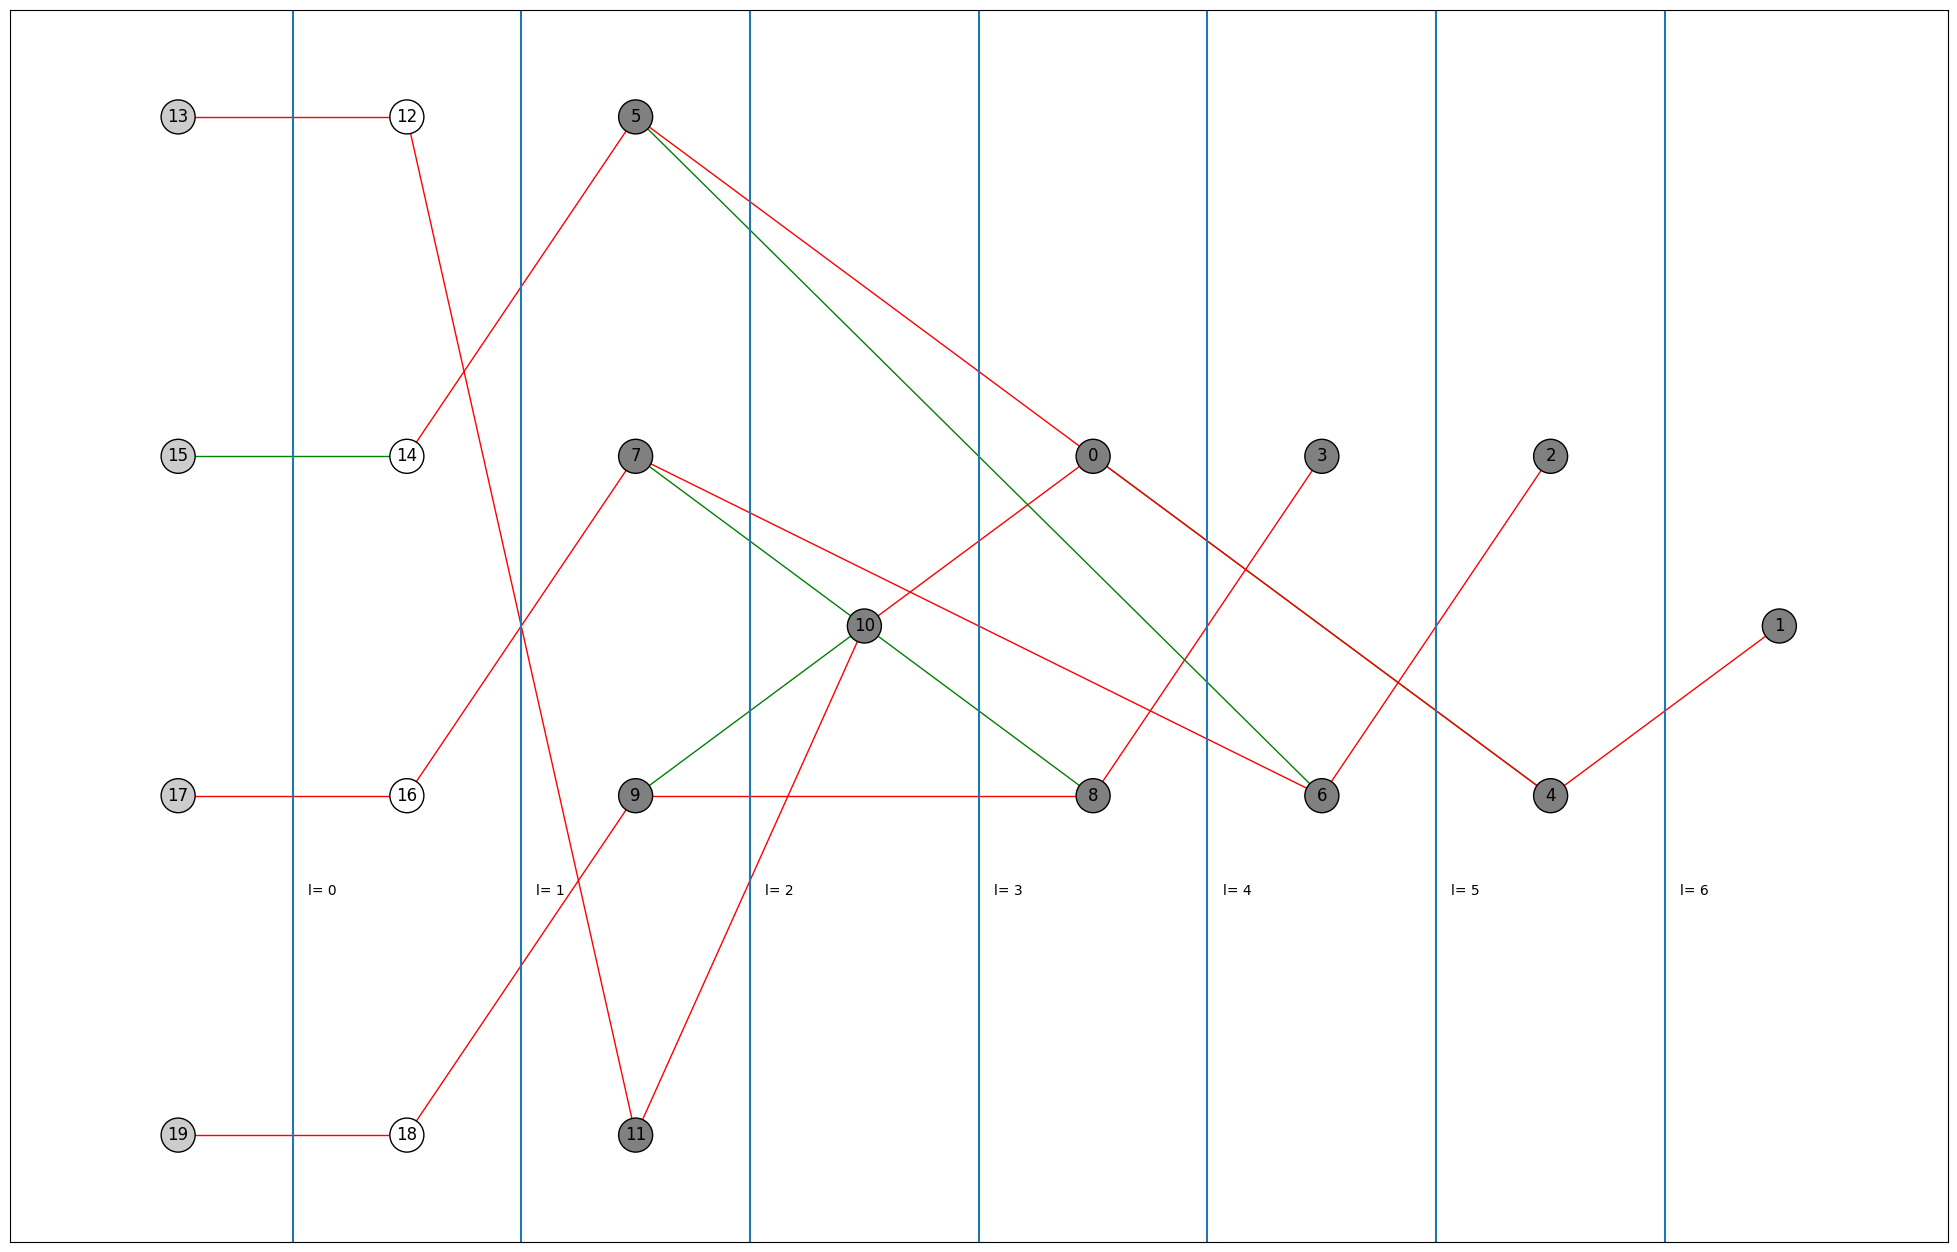

In [13]:
n = 4; layers= 1
crc2 = build_basic_ansatz(n, layers, params= 'th'); ptrn2 = crc2.standardize_and_transpile(opt=True); #ptrn2.parallelize_pattern()
pretty_plot_pattern(ptrn2, {0,1})

In [14]:
ptrn2.get_max_degree()

3

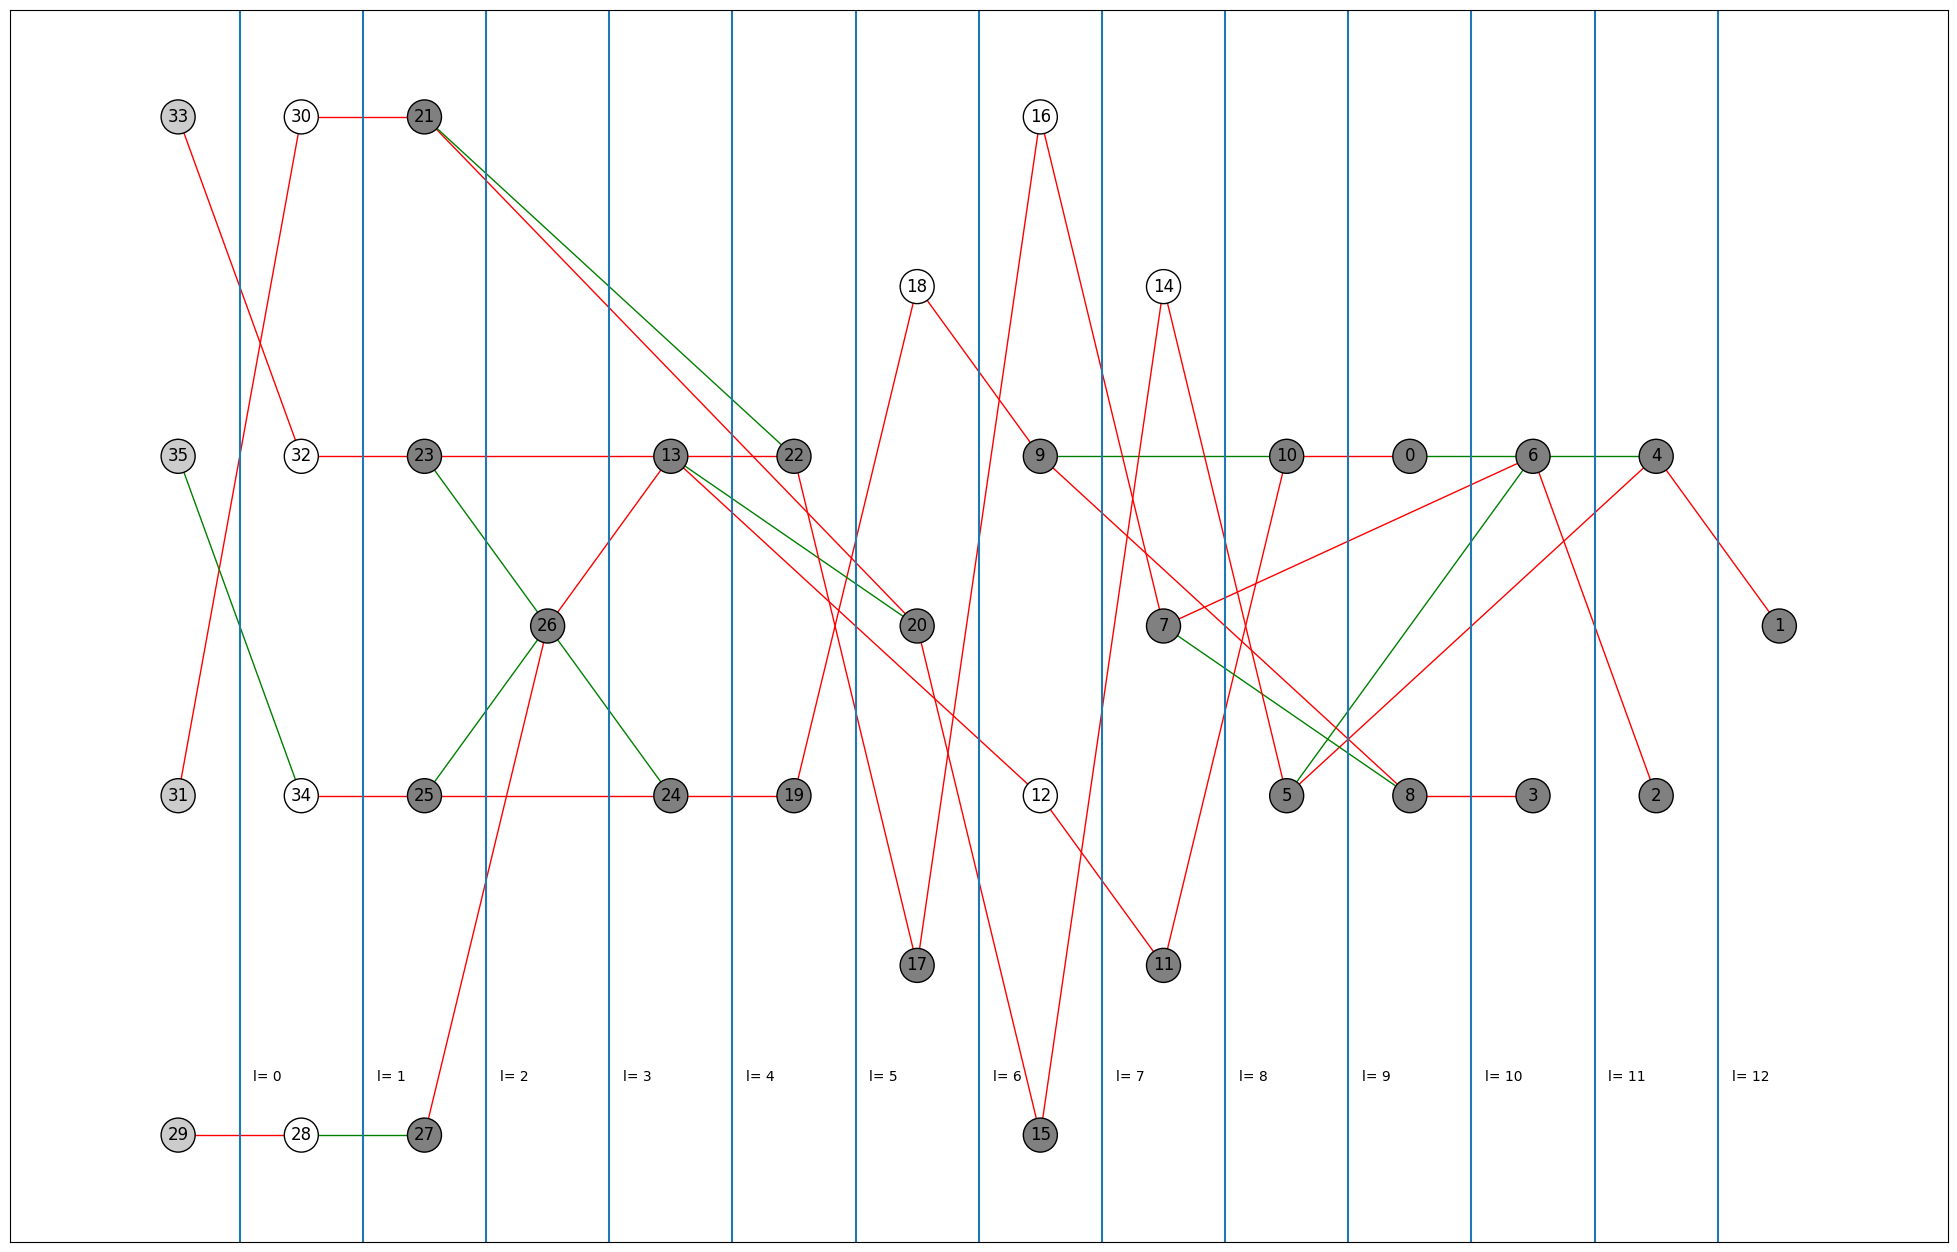

In [18]:
n = 4; layers= 2
crc2 = build_basic_ansatz(n, layers, params= 'th'); ptrn2 = crc2.standardize_and_transpile(opt=True); ptrn2.parallelize_pattern()
pretty_plot_pattern(ptrn2, {0,1})

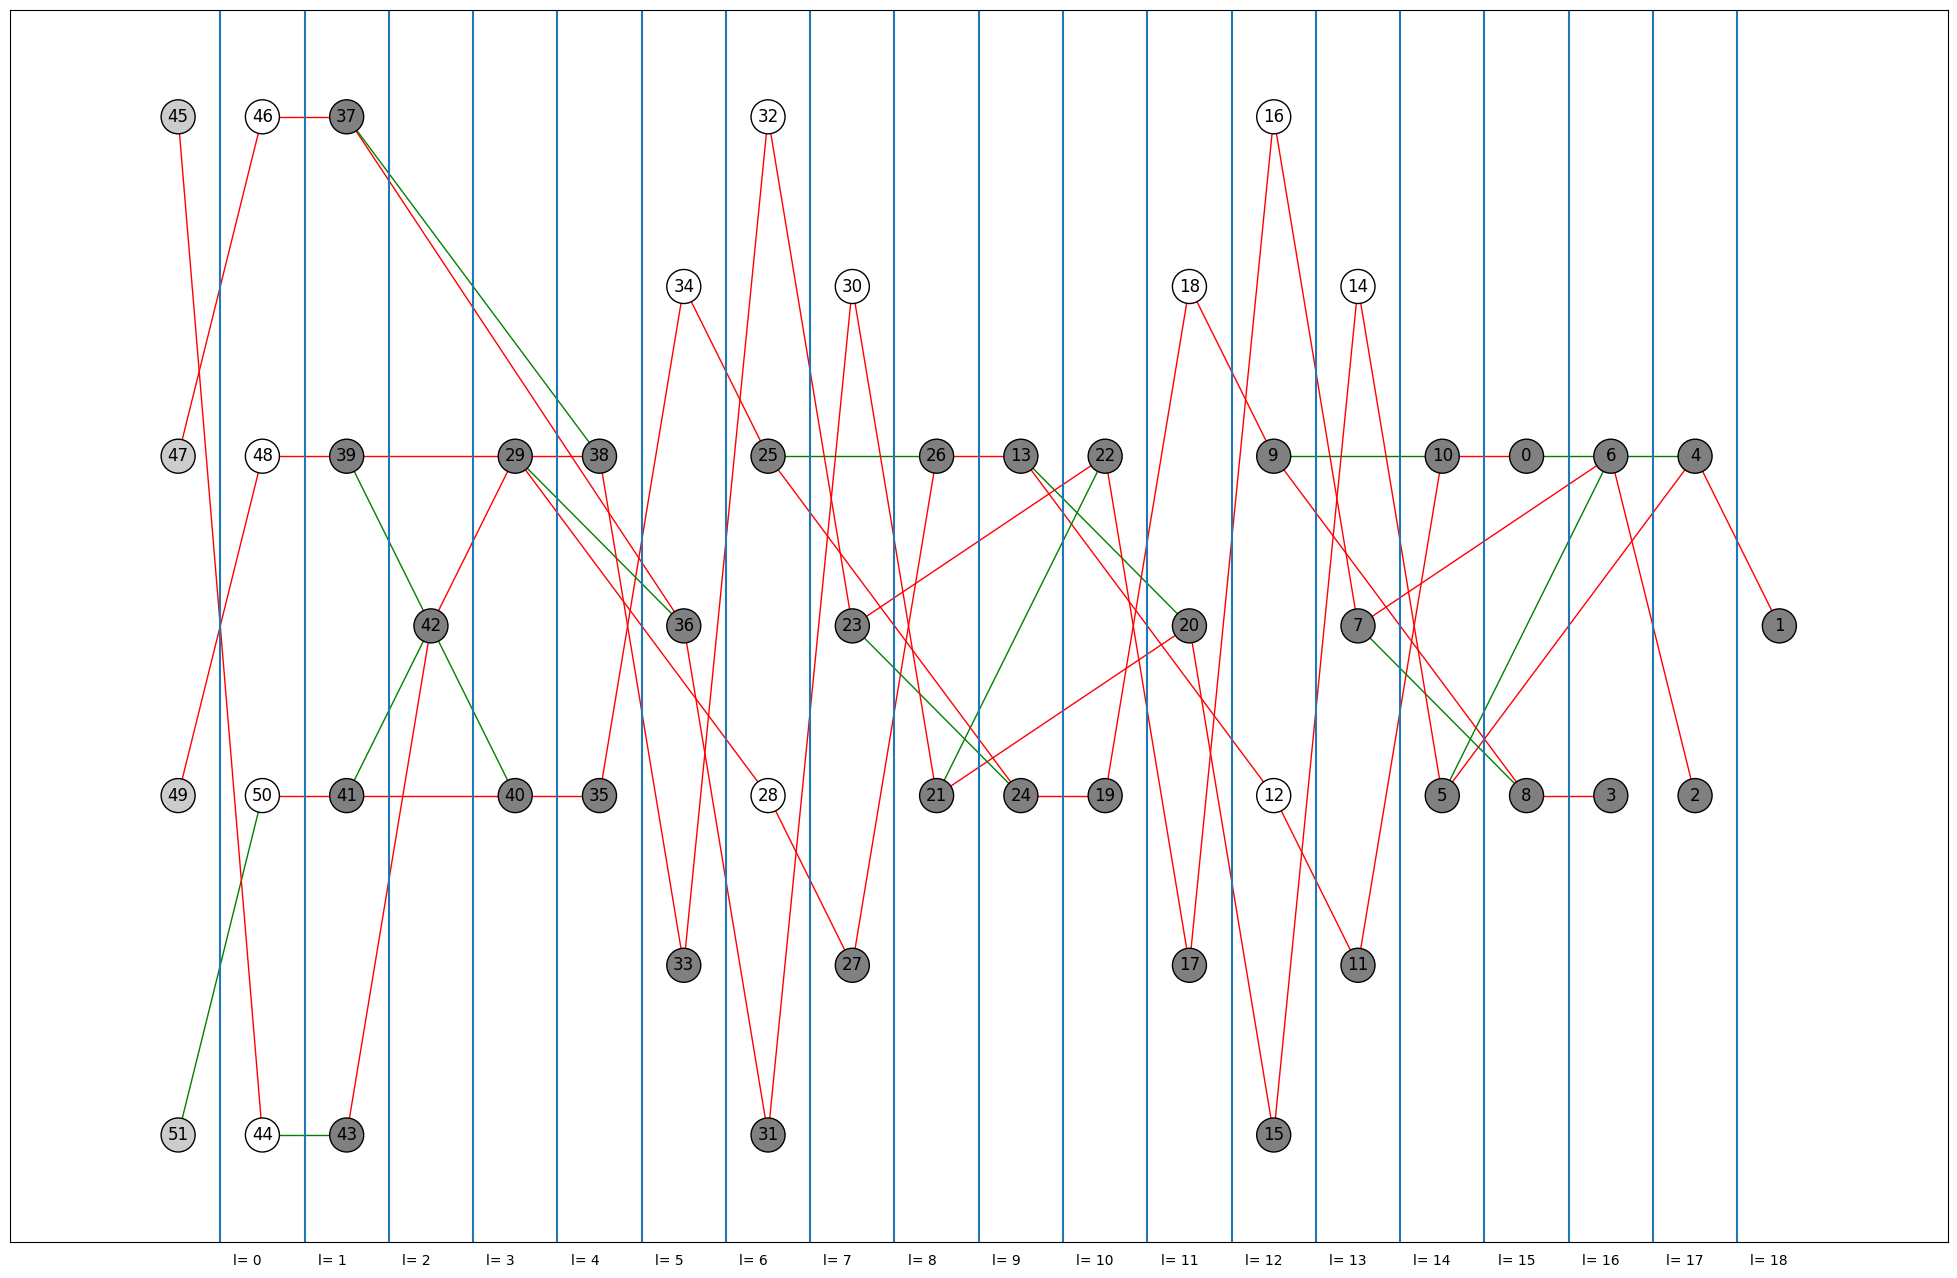

In [23]:
n = 4; layers= 3
crc2 = build_basic_ansatz(n, layers, params= 'th'); ptrn2 = crc2.standardize_and_transpile(opt=True); ptrn2.parallelize_pattern()
pretty_plot_pattern(ptrn2, {0,1})

3

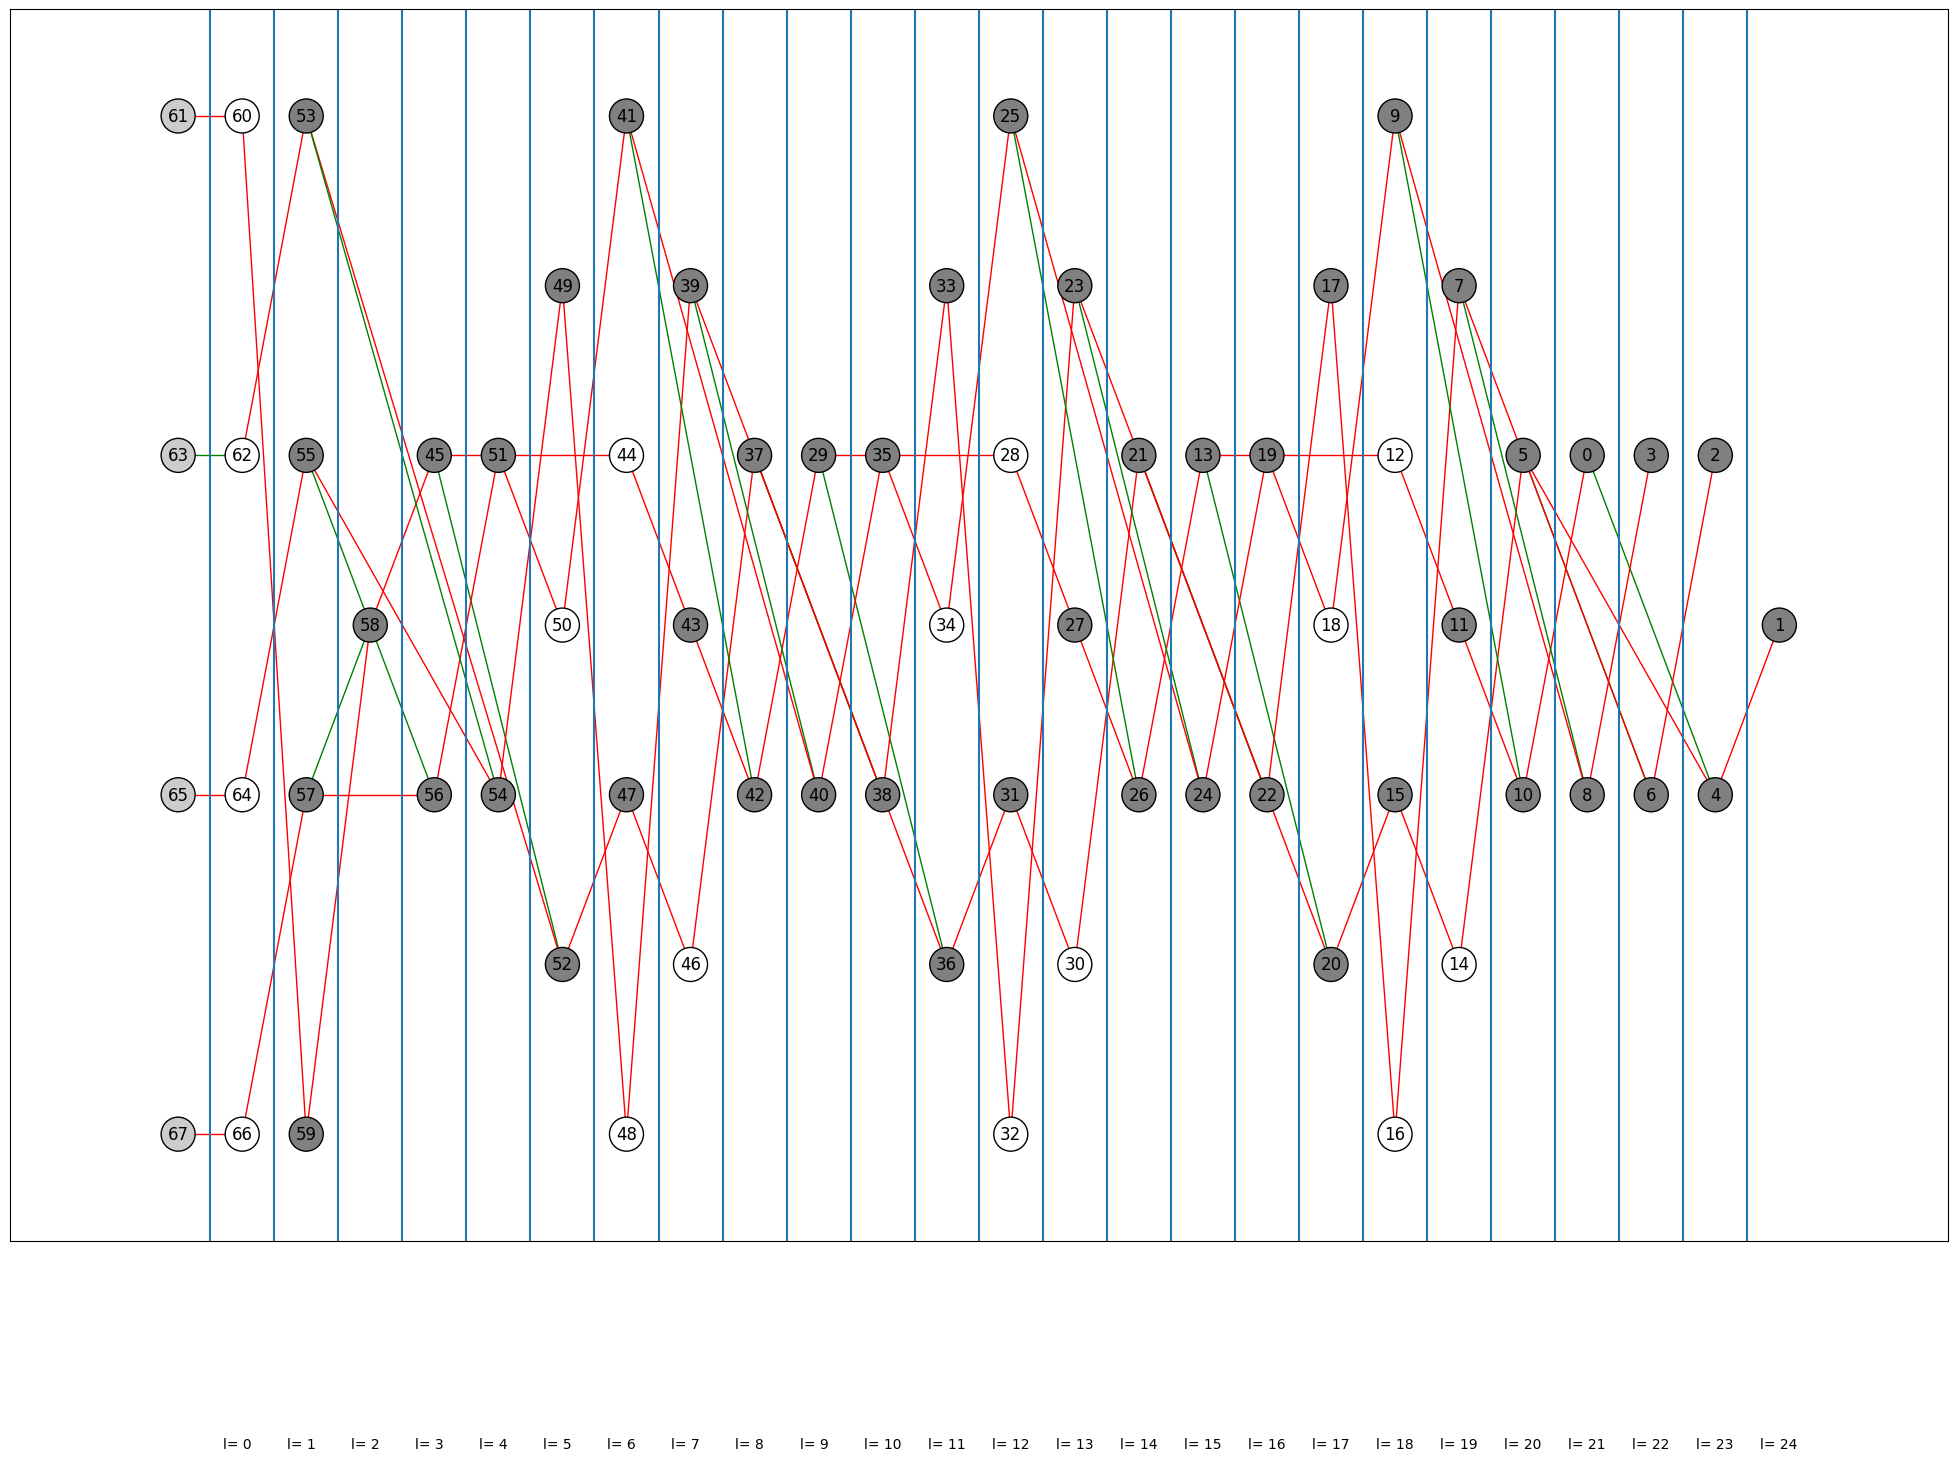

In [25]:
n = 4; layers= 4
crc2 = build_basic_ansatz(n, layers, params= 'th'); ptrn2 = crc2.standardize_and_transpile(opt=True);
pretty_plot_pattern(ptrn2, {0,1})

In [26]:
grp2 = get_nx_graph(ptrn2)

In [27]:
nx.degree_histogram(grp2)

[0, 7, 30, 31]

##### Random Graph

In [ ]:
th = Parameter('theta')

In [ ]:
grp = nx.Graph()

grp.add_nodes_from([1,2,3,4])
grp.add_edges_from([(2,3), (2,4), (1,3) ])

outputs = [3,4] ; inputs= [1,2]
mangles = {1: th , 2: 0.3 * th}


In [ ]:
pattrn = graphix.generate_from_graph(grp, mangles, inputs, outputs)
pattrn.standardize()

In [ ]:
pattrn.print_pattern()

N, node = 1
N, node = 2
N, node = 3
N, node = 4
E, nodes = (1, 3)
E, nodes = (2, 3)
E, nodes = (2, 4)
M, node = 1, plane = XY, angle(pi) = theta, s-domain = [], t_domain = []
M, node = 2, plane = XY, angle(pi) = 0.3*theta, s-domain = [], t_domain = [1]
X byproduct, node = 3, domain = [1]
X byproduct, node = 4, domain = [2]


In [ ]:
measure_pauli(pattrn)

In [ ]:
pauli_nodes(pattrn)

([],
 [['M', 1, 'XY', Parameter(theta), [], []],
  ['M', 2, 'XY', ParameterExpression(0.3*theta), [], [1]]])

In [ ]:
pattrn.correction_commands()

[['X', 3, [1]], ['X', 4, [2]]]

In [ ]:
pattrn.get_measurement_commands()

[['M', 1, 'XY', Parameter(theta), [], []],
 ['M', 2, 'XY', ParameterExpression(0.3*theta), [], [1]]]

In [ ]:
flow(grp, set(inputs), set(outputs))

({2: 4, 1: 3}, {1: 2, 2: 1, 3: 0, 4: 0})

In [ ]:
isinstance(np.pi, float)

True

/tmp/ipykernel_108076/2538968131.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  fac = longest / (length - 1)
/tmp/ipykernel_108076/2538968131.py:42: RuntimeWarning: invalid value encountered in scalar multiply
  pos[flow[i][j]] = (fac * j, -i)


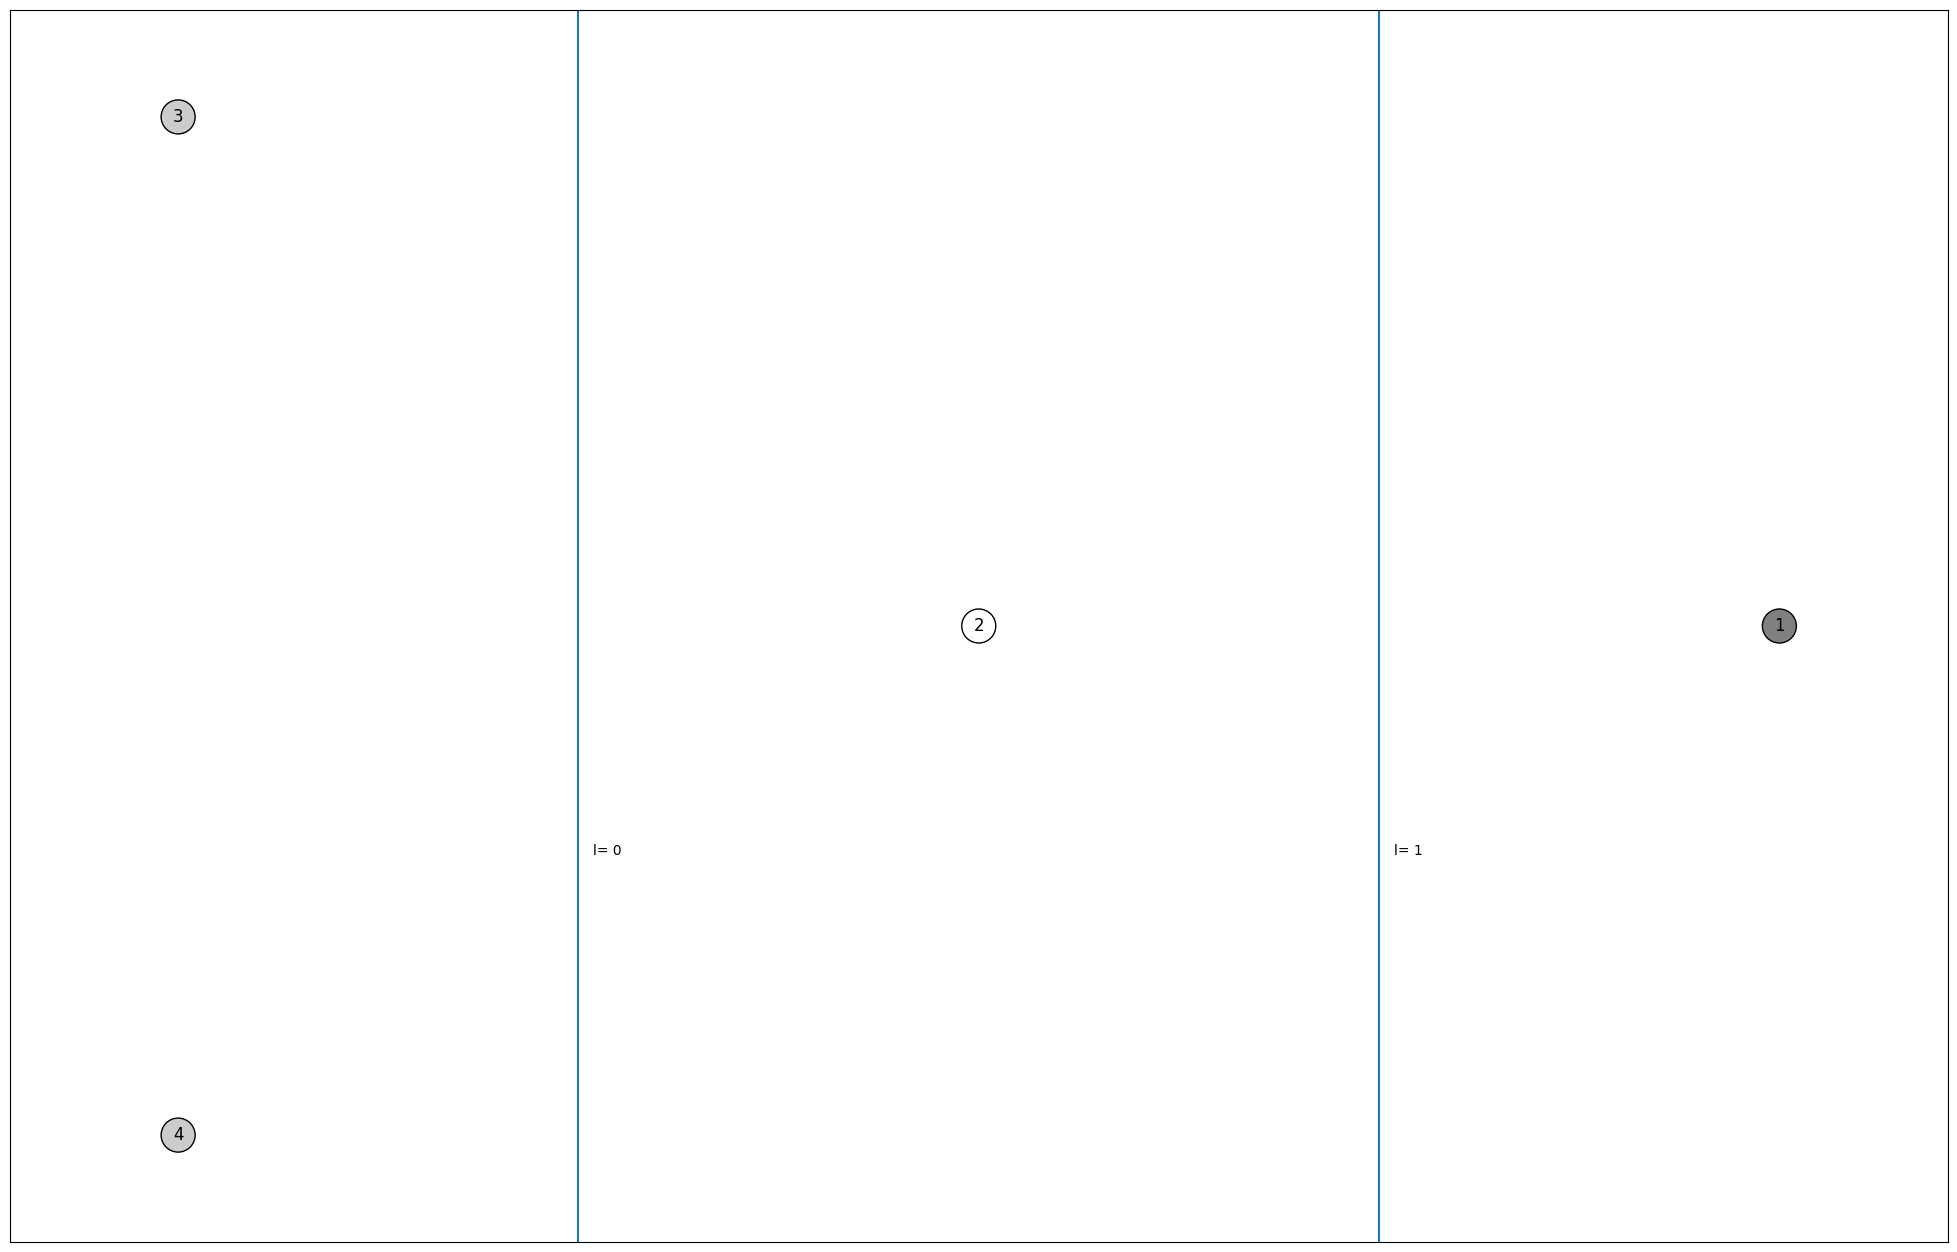

In [ ]:
pretty_plot_pattern(pattern= pattrn, input_nodes= set(inputs))

##### QAOA

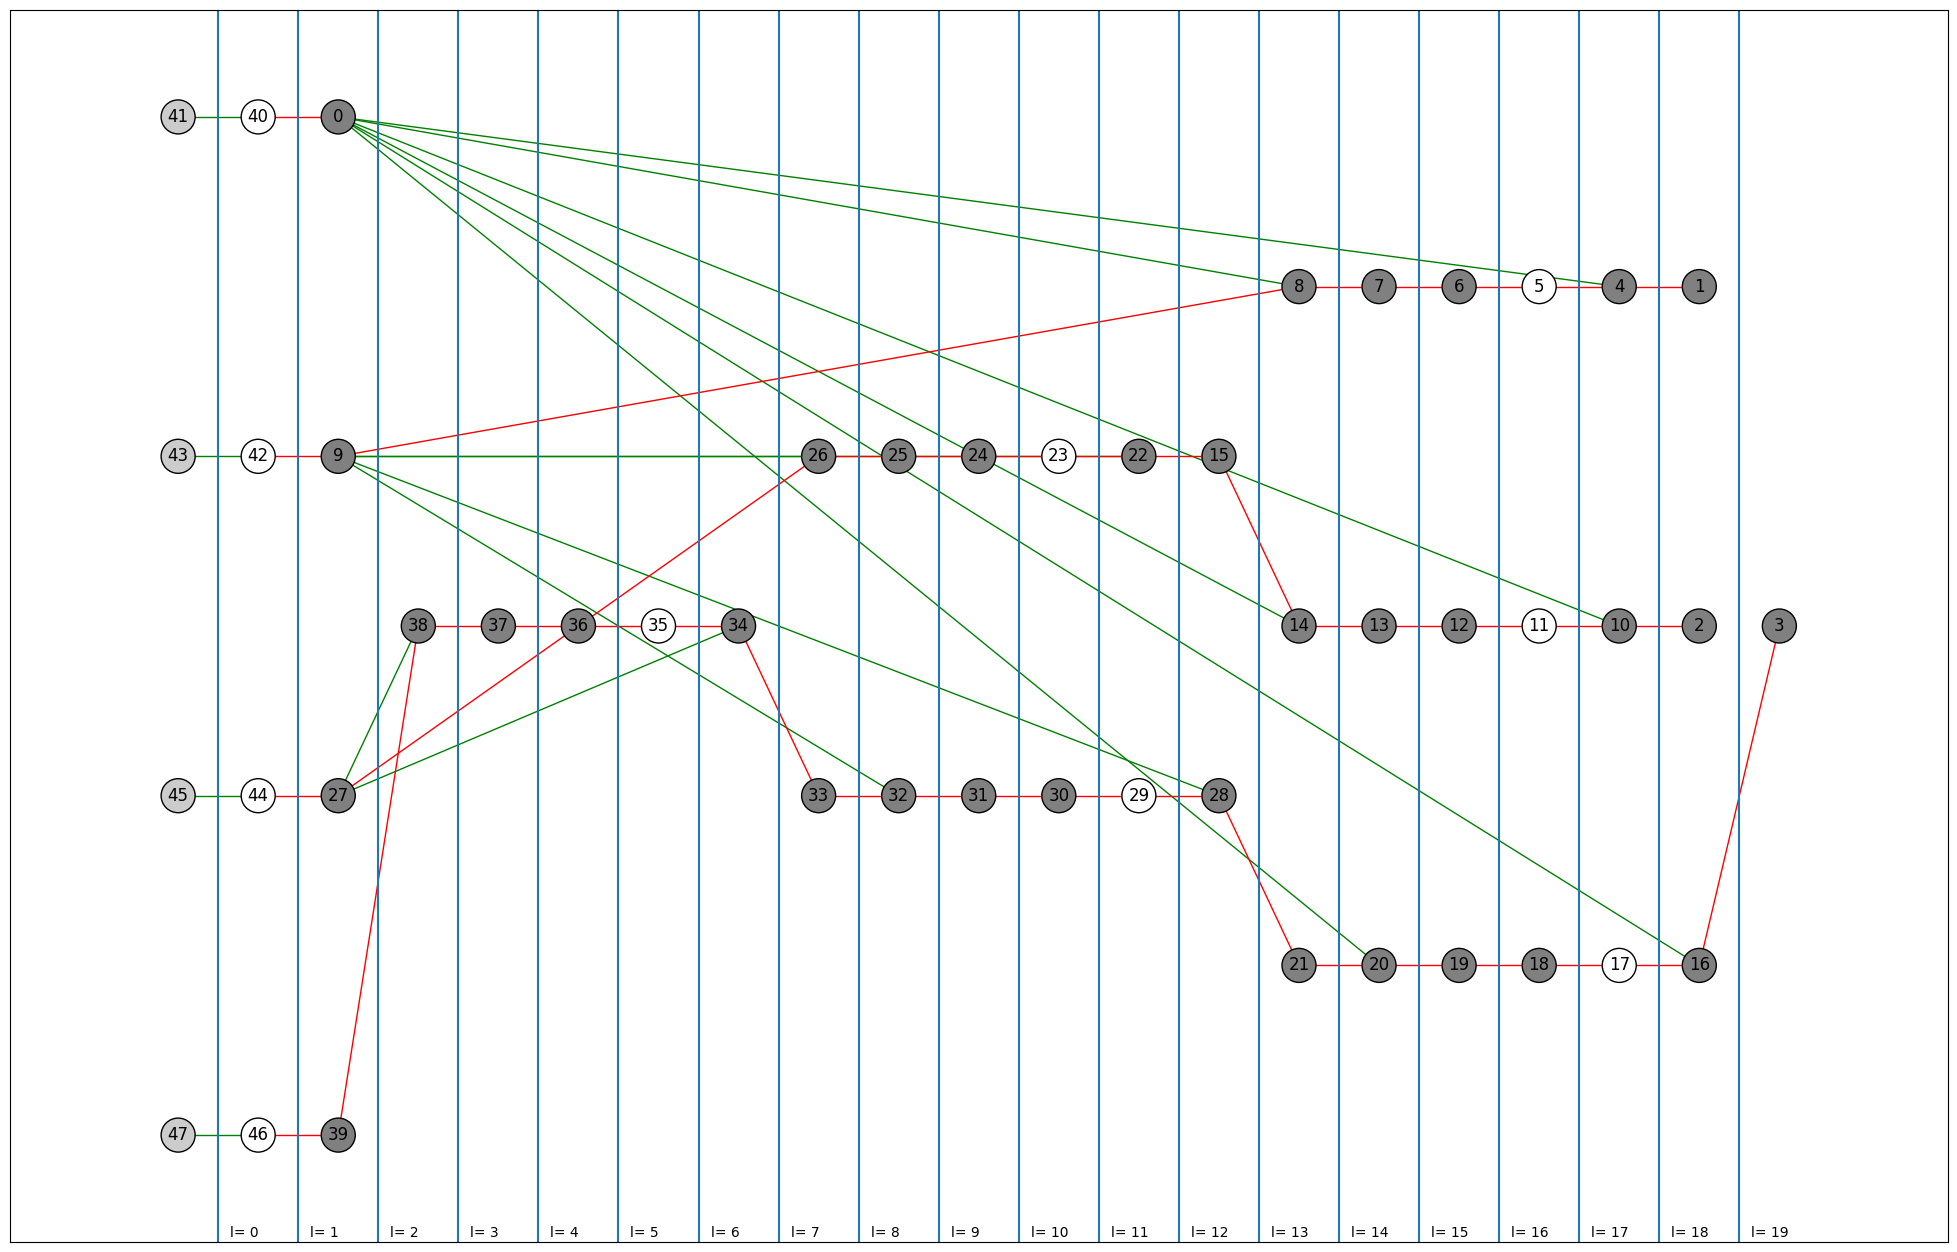

In [ ]:
n = 4
xi = np.random.rand(6)
theta = np.random.rand(4)
g = nx.complete_graph(n)
circuit = Circuit(n)
for i, (u, v) in enumerate(g.edges):
    circuit.cnot(u, v)
    circuit.rz(v, xi[i])
    circuit.cnot(u, v)
for v in g.nodes:
    circuit.rx(v, theta[v])

#%%
# transpile and get the graph state

pattern = circuit.transpile()
pattern.standardize()
pattern.shift_signals()
nodes, edges = pattern.get_graph()
g = get_nx_graph(pattern)
correction_map, layer_map = flow(g, {0, 1, 2, 3}, set(pattern.output_nodes))

pretty_plot_pattern(pattern, {0, 1, 2, 3})

In [ ]:
l_k

In [ ]:
layer_map

{0: 2,
 1: 19,
 2: 19,
 3: 20,
 4: 18,
 5: 17,
 6: 16,
 7: 15,
 8: 14,
 9: 2,
 10: 18,
 11: 17,
 12: 16,
 13: 15,
 14: 14,
 15: 13,
 16: 19,
 17: 18,
 18: 17,
 19: 16,
 20: 15,
 21: 14,
 22: 12,
 23: 11,
 24: 10,
 25: 9,
 26: 8,
 27: 2,
 28: 13,
 29: 12,
 30: 11,
 31: 10,
 32: 9,
 33: 8,
 34: 7,
 35: 6,
 36: 5,
 37: 4,
 38: 3,
 39: 2,
 40: 1,
 41: 0,
 42: 1,
 43: 0,
 44: 1,
 45: 0,
 46: 1,
 47: 0}

In [ ]:
pattern.simulate_pattern(backend= 'tensornetwork')